In [579]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from subprocess import check_output
%matplotlib inline

In [580]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/countries-of-the-world/countries-of-the-world.csv')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [581]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [582]:
data.shape

(227, 20)

In [583]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [584]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [585]:
data.corr()

,Population,Area (sq. mi.),GDP ($ per capita)
Population,1.000000,0.469985,-0.039324
Area (sq. mi.),0.469985,1.000000,0.072185
GDP ($ per capita),-0.039324,0.072185,1.000000


In [586]:
data.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                          True
Infant mortality (per 1000 births)     True
GDP ($ per capita)                     True
Literacy (%)                           True
Phones (per 1000)                      True
Arable (%)                             True
Crops (%)                              True
Other (%)                              True
Climate                                True
Birthrate                              True
Deathrate                              True
Agriculture                            True
Industry                               True
Service                                True
dtype: bool

In [587]:
data.fillna(0.0, inplace = True)

In [588]:
data.isnull().any()

Country                               False
Region                                False
Population                            False
Area (sq. mi.)                        False
Pop. Density (per sq. mi.)            False
Coastline (coast/area ratio)          False
Net migration                         False
Infant mortality (per 1000 births)    False
GDP ($ per capita)                    False
Literacy (%)                          False
Phones (per 1000)                     False
Arable (%)                            False
Crops (%)                             False
Other (%)                             False
Climate                               False
Birthrate                             False
Deathrate                             False
Agriculture                           False
Industry                              False
Service                               False
dtype: bool

In [589]:
data.corr()

,Population,Area (sq. mi.),GDP ($ per capita)
Population,1.000000,0.469985,-0.038208
Area (sq. mi.),0.469985,1.000000,0.072823
GDP ($ per capita),-0.038208,0.072823,1.000000


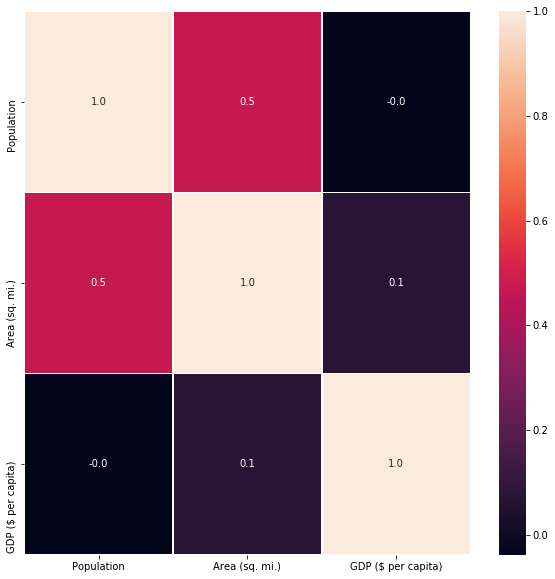

In [590]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

[]

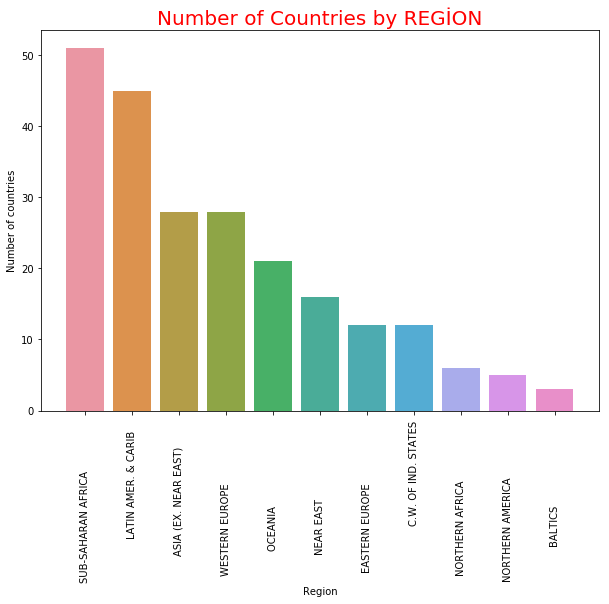

In [591]:
region = data["Region"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=region.index,y=region.values)
plt.xticks(rotation=90)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by REGİON',color = 'red',fontsize=20)
plt.plot()

In [592]:
s = set(data["Country"])
len(s)
# l=data['Country'].map(str).apply(len)
# len(l)


227

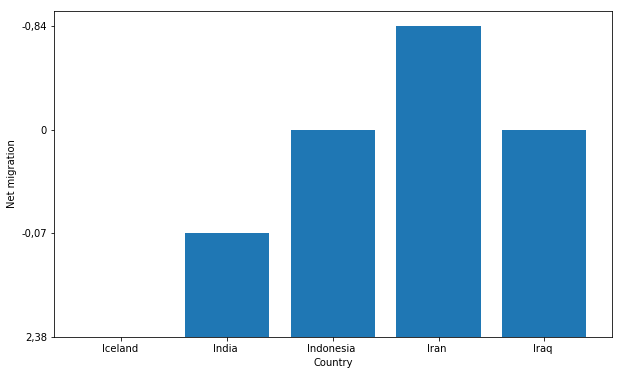

In [593]:
#get a info about a countries whose name start with a specific letter
data= data[data['Country'].apply(lambda country: country[0] == 'I')].head()

plt.figure(figsize=(10,6))
plt.bar(data['Country'],data['Net migration'])
plt.xlabel('Country')
plt.ylabel('Net migration')
plt.show()



In [578]:
# data= data[data['Country'].apply(lambda country: country[0] == 'G')].head()
# plt.figure(figsize=(10,6))
# plt.bar(data['Country'],data['Population'])
# plt.xlabel('Country')
# plt.ylabel('Population')
# plt.show()


In [560]:
# data= data[data['Country'].apply(lambda country: country[0] == 'P')].head()
# plt.figure(figsize=(10,6))
# plt.bar(data['Country'],data['Birthrate'])
# plt.xlabel('Country')
# plt.ylabel('Birthrate')
# plt.show()

In [559]:
# data= data[data['Country'].apply(lambda country: country[0] == 'P')].head()
# plt.figure(figsize=(10,6))
# plt.bar(data['Country'],data['Literacy (%)'])
# plt.xlabel('Country')
# plt.ylabel('Literacy rate')
# plt.show()

[]

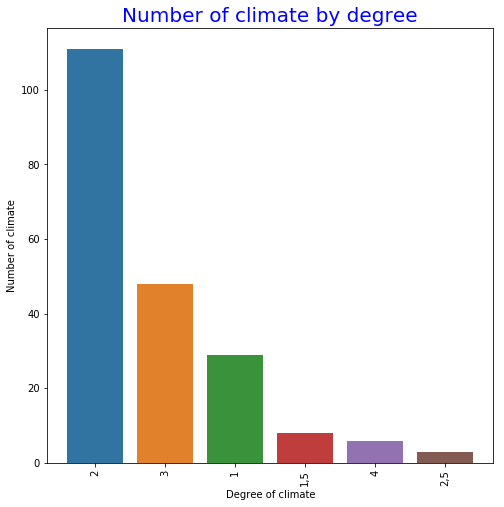

In [537]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/countries-of-the-world/countries-of-the-world.csv')
data.head()

climate = data['Climate'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(x=climate.index,y=climate.values)
plt.xticks(rotation=90)
plt.xlabel('Degree of climate')
plt.ylabel('Number of climate')
plt.title('Number of climate by degree',color = 'blue',fontsize=20)
plt.plot()


# climate = data["Climate"].value_counts()
# plt.figure(figsize=(10,7))
# sns.barplot(x=climate.index,y=climate.values)
# plt.xticks(rotation=90)
# plt.ylabel('Number of climate')
# plt.xlabel('Degree of climate')
# plt.title('Number of climate by degree',color = 'blue',fontsize=20)

# plt.plot()

In [489]:
group = data.groupby("Region")
group.mean()

,Population,Area (sq. mi.),GDP ($ per capita)
Region,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,8053.571429
BALTICS,2.394991e+06,5.833833e+04,11300.000000
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,4000.000000
EASTERN EUROPE,9.992893e+06,9.601850e+04,9808.333333
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,8682.222222
NEAR EAST,1.219177e+07,2.722241e+05,10456.250000
NORTHERN AFRICA,2.690119e+07,1.003148e+06,5460.000000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,26100.000000
OCEANIA,1.577698e+06,4.057053e+05,8247.619048


[]

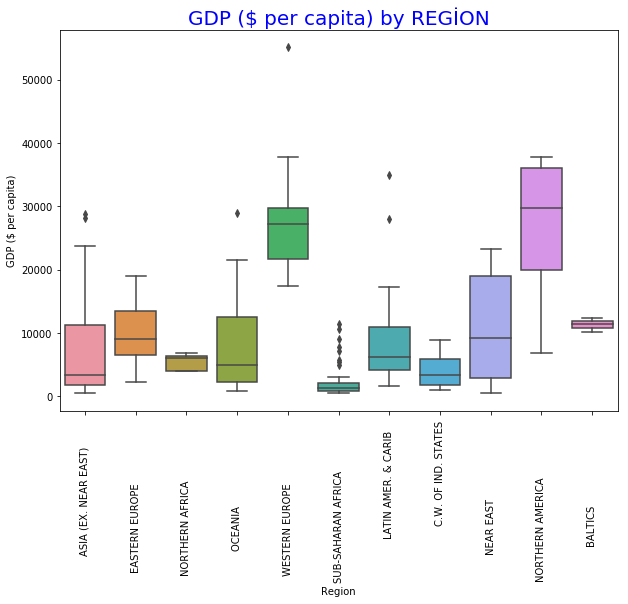

In [490]:
# region = data["Region"].value_counts()
plt.figure(figsize=(10,7))
sns.boxplot(x=data['Region'],y=data['GDP ($ per capita)'])
plt.xticks(rotation=90)
plt.ylabel('GDP ($ per capita)')
plt.xlabel('Region')
plt.title('GDP ($ per capita) by REGİON',color = 'blue',fontsize=20)
plt.plot()

[]

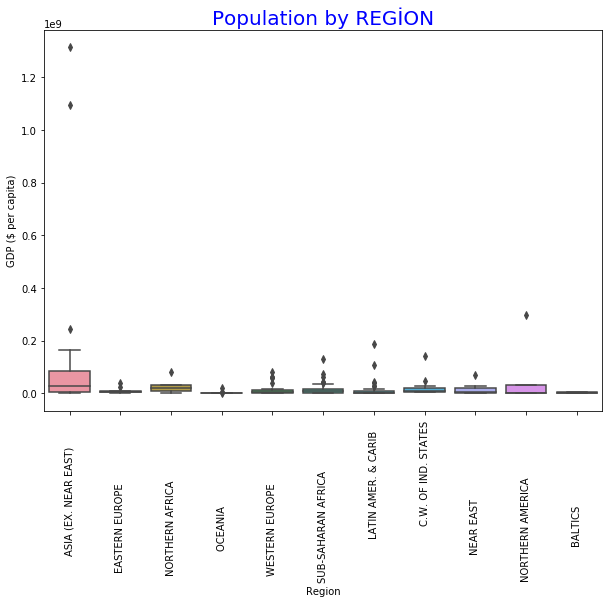

In [491]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data['Region'],y=data['Population'])
plt.xticks(rotation=90)
plt.ylabel('GDP ($ per capita)')
plt.xlabel('Region')
plt.title('Population by REGİON',color = 'blue',fontsize=20)
plt.plot()

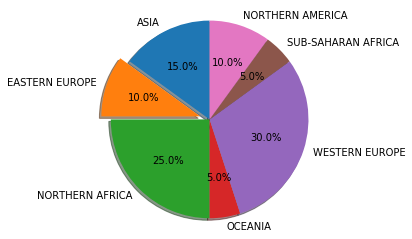

In [492]:
explode = (0, 0.1, 0, 0,0,0,0)

sizes=[15,10,25,5,30,5,10]

labels="ASIA","EASTERN EUROPE","NORTHERN AFRICA","OCEANIA","WESTERN EUROPE","SUB-SAHARAN AFRICA","NORTHERN AMERICA"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [493]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/countries-of-the-world/countries-of-the-world.csv')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [494]:
print(data.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [495]:
data.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227,227,224,224,226.000000,209,223,225,225,225,205,224,223,212,211,212
unique,227,11,NaN,NaN,219,151,157,220,NaN,140,214,203,162,209,6,220,201,150,155,167
top,Cote d'Ivoire,SUB-SAHARAN AFRICA,NaN,NaN,"372,5","0,00",0,"9,95",NaN,"99,0","255,6",0,0,100,2,"20,48","6,48","0,01","0,11","0,684"
freq,1,51,NaN,NaN,2,44,62,3,NaN,13,2,9,28,8,111,2,2,8,4,5
mean,NaN,NaN,2.874028e+07,5.982270e+05,NaN,NaN,NaN,NaN,9689.823009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,NaN,NaN,NaN,NaN,10049.138513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,NaN,NaN,NaN,NaN,5550.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,NaN,NaN,NaN,NaN,15700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


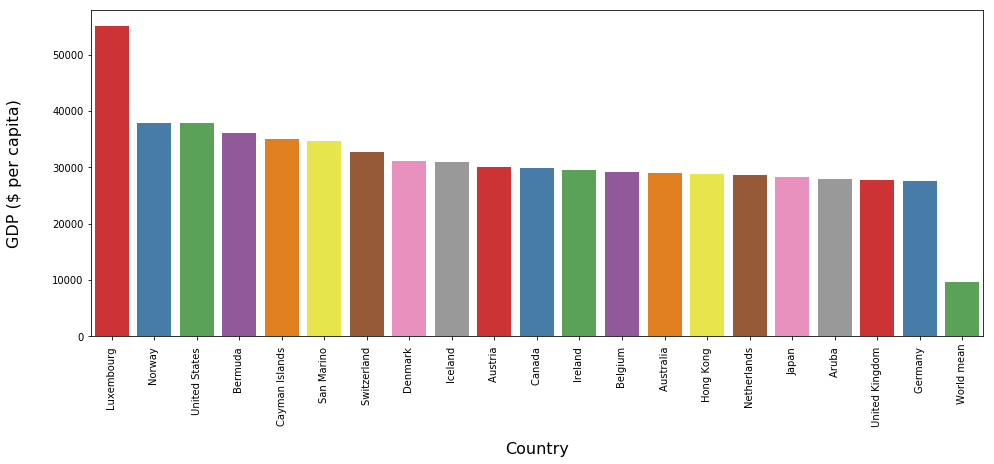

In [496]:
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


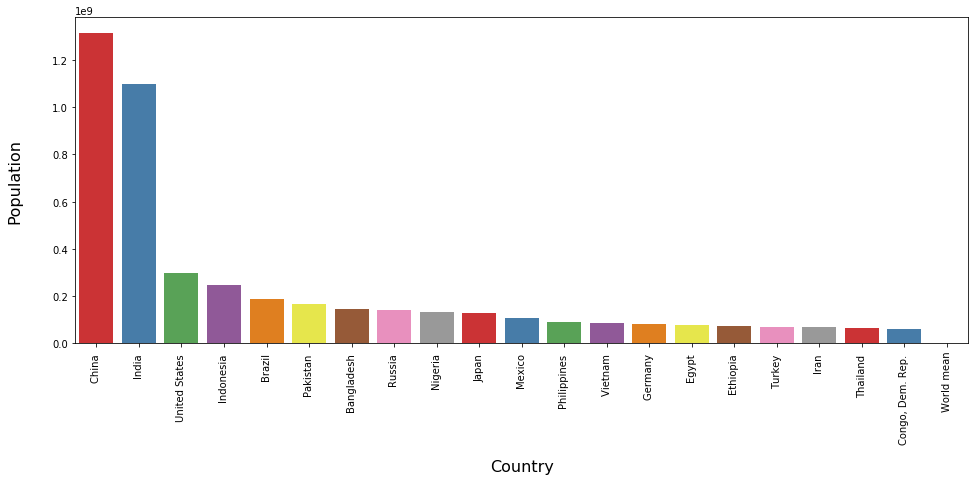

In [497]:
most_populated_countries = data.sort_values('Population',ascending = False).head(20)
mean_population = pd.DataFrame({'Country':['World Mean'],'Population':[data['Population'].mean()]})
countries = pd.concat([most_populated_countries[['Country','Population']],mean], ignore_index=False)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='Population', data=countries, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

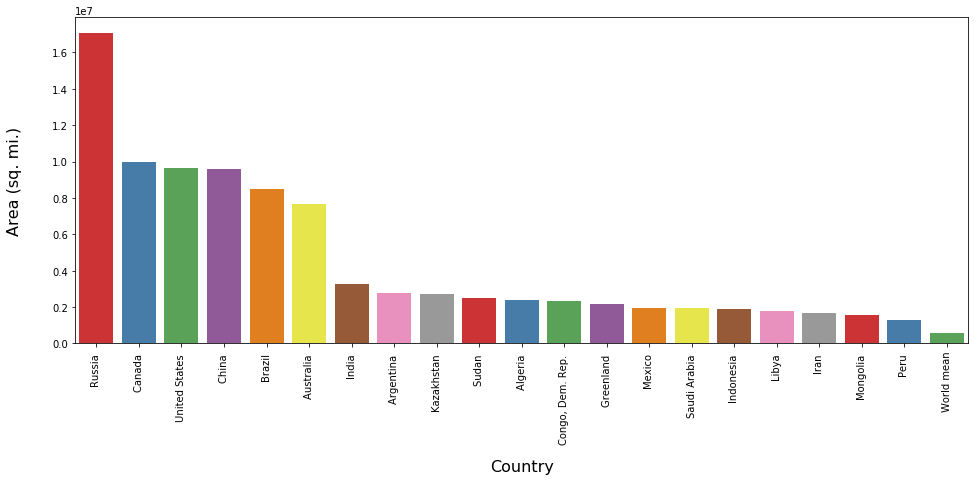

In [498]:
top_countries = data.sort_values('Area (sq. mi.)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'Area (sq. mi.)':[data['Area (sq. mi.)'].mean()]})
var = pd.concat([top_countries[['Country','Area (sq. mi.)']],mean],ignore_index=True)
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='Area (sq. mi.)', data=var, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()